# SVM Kernels

<div class="alert alert-block alert-info">
<ul><strong>
<li>MIGUEL DOMINGUEZ</li>
<li>CSC 59929</li>
<li>Machine Learning</li>
<li>Prof. Erik K. Grimmelmann </li>
<li>Date: 11/05/17 </li>
<li>Homework Week 9 </li>
</strong>
</ul>
</div>

<div class="alert alert-block alert-warning">
<h2>Keywords</h2>
<ul>
<li><b>support vector machine (SVM):</b> a classifier that maximizes the margin in order to create a hyperplane that classifies data classes</li>
<li><b>margin:</b> distance between the separating hyperplane (decision boundary) and the training samples close to this hyperplane.</li>
<li><b>support vectors:</b> samples closest to the hyperplane</li>
<li><b>regularization:</b> parameter C which determines how much the SVM model should avoid misclassifying data, higher C gives a lower margin while low C gives a larger margin even if there are misclassifications. </li>
<li><b>gamma:</b> parameter that determines how much a single point should influece in the margin, for high gamma: only close points are considered, for low gamma: far away points are considered as well  </li>
<li><b>kernel:</b>function whose output is a measure of how similar the two input vectors are </li>
<li><b>kernel trick:</b> using a kernel function to map data to higher dimensionality in order to separate the classes, reduces computational cost for kernel SVM</li>
</ul>
</div>


In [89]:
# code from Scikit Learn Documentation

In [90]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
#from graphviz import Digraph  

In [91]:
print(__doc__)

Automatically created module for IPython interactive environment


## Discussion and Results:

<div class="alert alert-block alert-success">In this assignment we will experiment with SVM kernels. As always, we will use the simple Iris Dataset to compare the various SVM kernels. We start with documentation code from scikit-learn. <br><br>

First we discuss the simple SVM machine learning model. Here, we try to maximize the margin in order to obtain the decision boundary of hyperplane that separates the classes. We also take into consideration the effects of the parameters regularization and gamma. For regularization, we take into account how much we want to avoid miscalssifying samples. For gamma, we take into account how far each sample has influence in the margin. <br><br>

There are times when our data cannot simply be separated by a line. In those cases, we use kernels which are mathematical functions that map the current data to a bigger dimensionality in order to separate the data with hyperplanes. We dive into those different models.<br><br> 

We create different models with various kernels first using two features and then using all features of the Iris Dataset. Some of those are: Radial basis function kernel, linear, polynomial, linear support vector regression, nu-support vector regression and classification.<br><br>

For the plots that use two features of the Iris Dataset, we can obseve some interesting patterns for each model. For the linear kernel we can see how a straight line separates the classes. For polynomial we run kernels in quadratic, cubic and forth degree. We can appreciate how the increasing degree tries to capture all the points in the classes, tending to overfit the model. 
The nu-svc and nu-svr have a parameter nu that controls the number of support vectors, for both we can see that the models try to group each class into a section with an irregular shape. When it comes to accuracy, the lowest accuracy is 72% and the highest is 83%. For the case with all features we see an improvement, the lowest accuracy is 92% and the highest is 99%. Therefore, we conclude that we should always seek for the kernel that is more convenient for our data. 

The results can be seen in the plots for the two features and the accuracy can be seen in the bar charts for both cases. 
</div>

In [92]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def barchart(model_accuracy, model_title,optext):
    """Plot bars for accuracy for each model.
    
    Parameters
    ----------
    model_accuracy: list of float accuracy values
    model_title: list of names for each model
    optext: optional string that is part of plot graph
    """
    width = 0.75
    ind = np.arange(10)
    fig, ax = plt.subplots(figsize=(20,15))
    colors = ['#DEB887','#A1EAFB','#CFEE91','#FFFF99','#49BEB7','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
    bars = ax.bar([0,1,2,3,4,5,6,7,8,9], model_accuracy , width, color=colors)

    #Add some text for labels, title and axes ticks
    ax.set_xlabel("Models",fontsize=20)
    ax.set_ylabel('Accuracy',fontsize=20)
    ax.set_title('SVM Kernels Models and their Accuracy' + optext,fontsize=35)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(range(0,10),
                      fontsize = 20)
    ax.legend(bars,model_title, loc= 'upper center',fontsize=25)

    def autolabel(rects,fontsize=20):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,height,
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(bars)
    plt.ylim([0,2])
    plt.show()

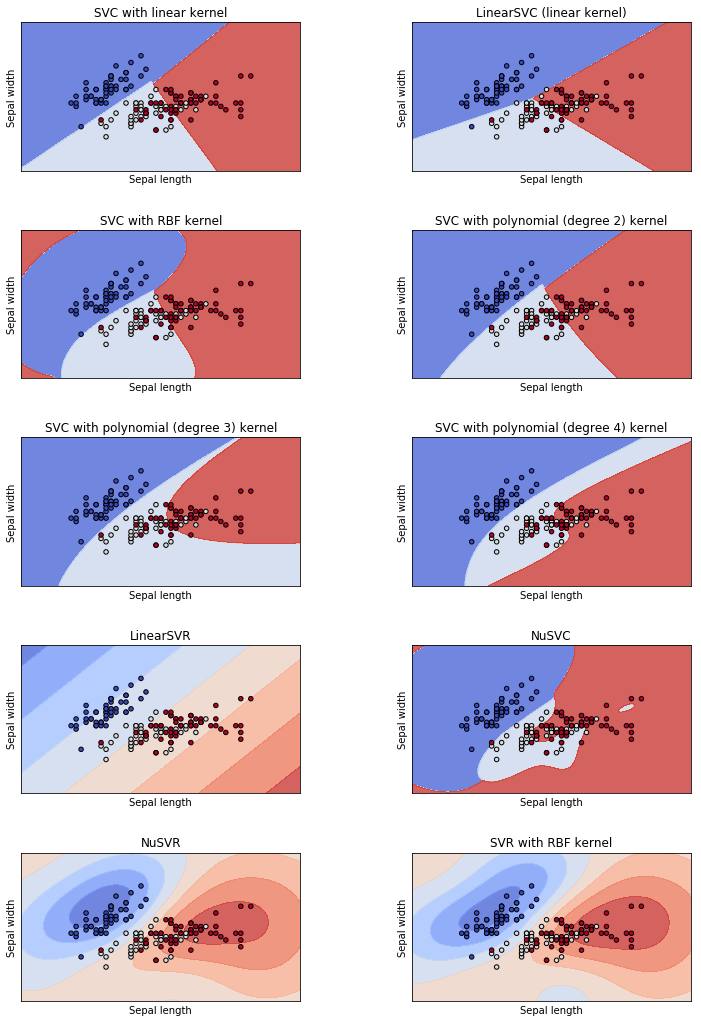

In [93]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='poly', degree=5, C=C),
          svm.LinearSVR(C=C),
          svm.NuSVC(),
          svm.NuSVR(),
          svm.SVR(kernel='rbf', C=C))  #
models = (clf.fit(X, y) for clf in models)

    
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'LinearSVR',
          'NuSVC',
          'NuSVR',
          'SVR with RBF kernel' ) 
    

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(nrows=5, ncols=2, figsize= (12,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracy = []

for clf, title, ax in zip(models, titles, sub.flatten()):
    accuracy.append(np.around(clf.score(X,y),decimals =4))
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## Comparing Kernel models, 2 features (Sepal Length vs Sepal Width)

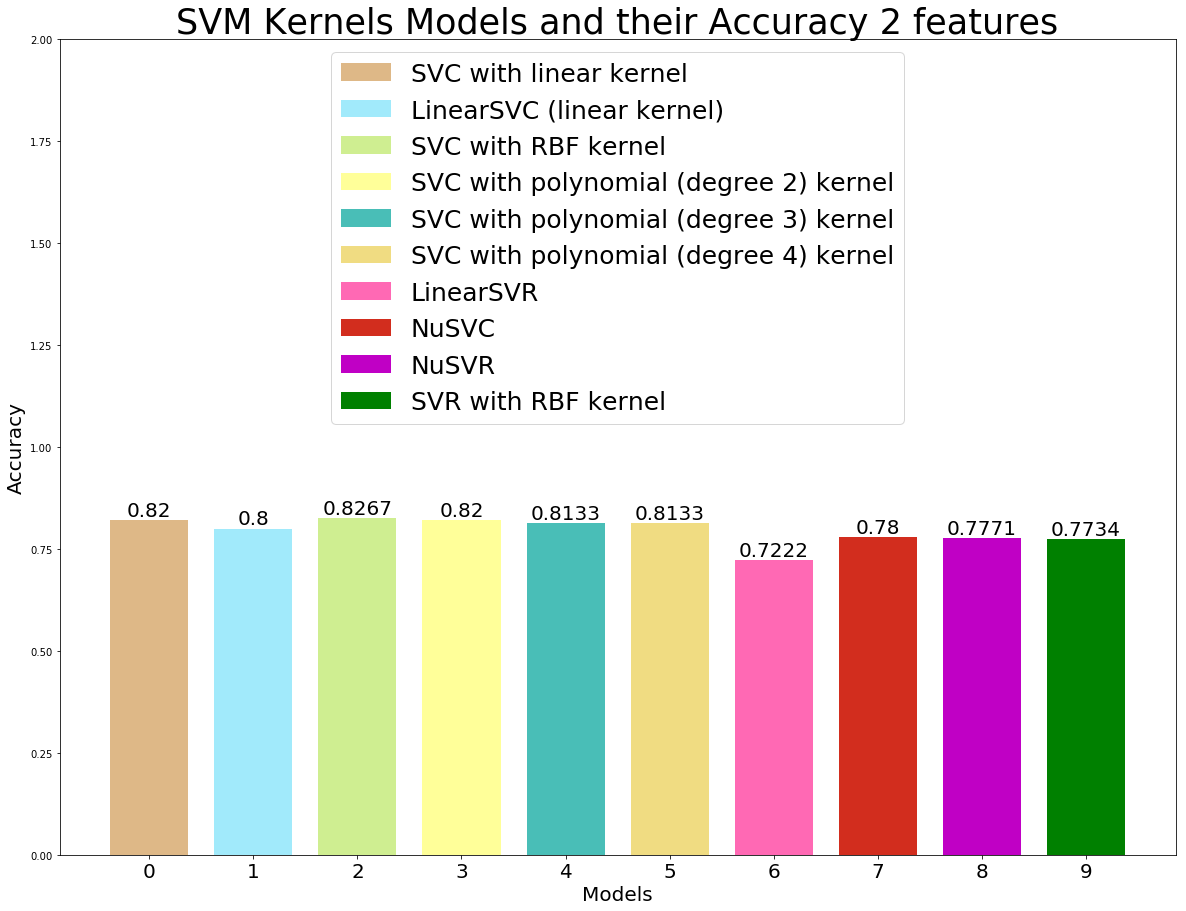

In [94]:
barchart(accuracy,titles," 2 features")

In [95]:
# Take all features this time
X = iris.data
y = iris.target

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='poly', degree=5, C=C),
          svm.LinearSVR(C=C),
          svm.NuSVC(),
          svm.NuSVR(),
          svm.SVR(kernel='rbf', C=C))  

models = (clf.fit(X, y) for clf in models) 
    
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'LinearSVR',
          'NuSVC',
          'NuSVR',
          'SVR with RBF kernel' ) 
accuracy = []
for clf in models:
    accuracy.append(np.around(clf.score(X,y),decimals =4))

## Comparing Kernel models, 4 features

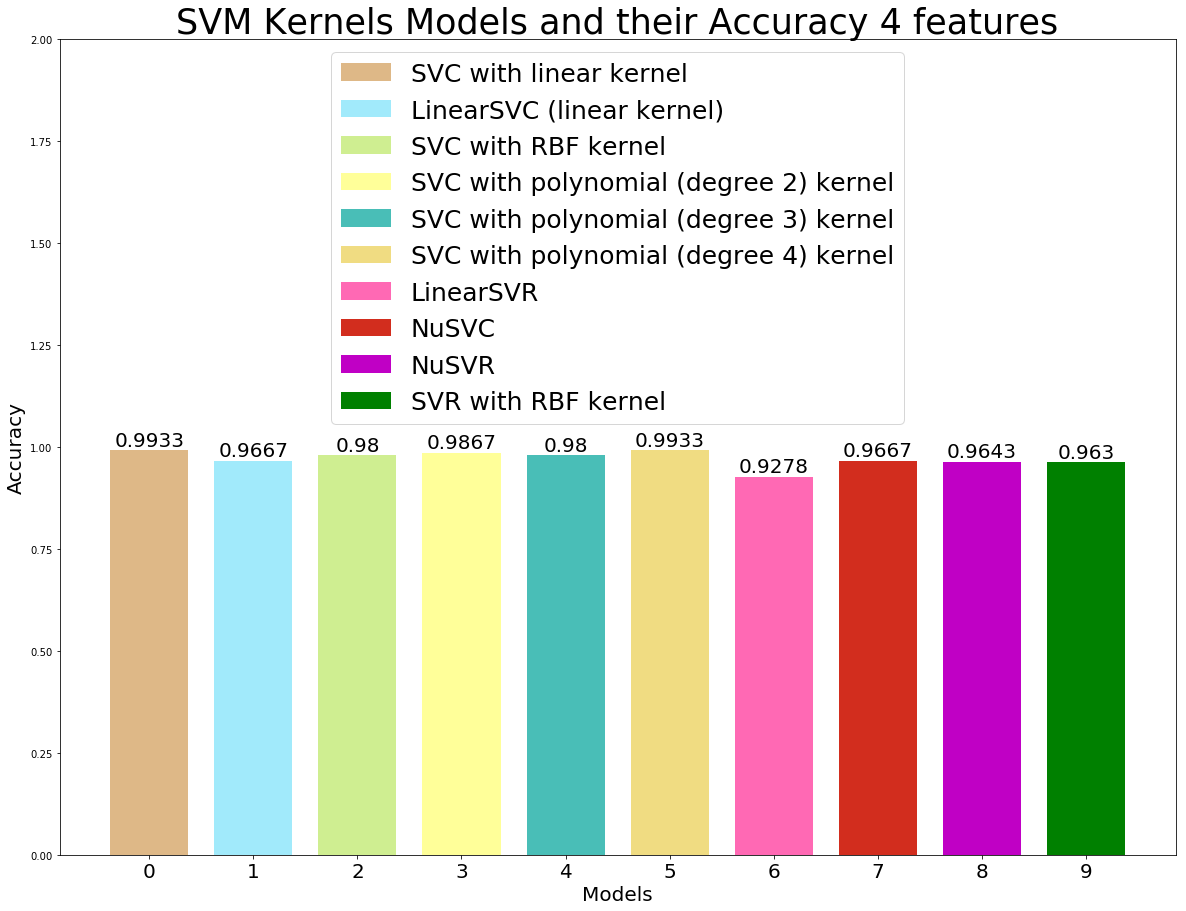

In [96]:
barchart(accuracy,titles," 4 features")